In [1]:
!pip install mysql-connector-python

In [2]:
import mysql.connector
import pandas as pd 

In [3]:
connectsql = mysql.connector.connect(host='127.0.0.1', database='terpBuy', user='root', password='vivek kumar1234567890')

In [4]:
df_qty_department = pd.read_sql('SELECT count(p.product_name) AS "Product name", d.department_name AS "Department name" \
FROM department d, product p WHERE p.department_id = d.department_id GROUP BY d.department_id', connectsql)
df_qty_department

C:\Users\vivek kumar\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,Product name,Department name
0,7,Fitness
1,8,Footwear
2,7,Apparel
3,7,Golf
4,27,Outdoors
5,6,Fan Shop
6,1,Book Shop
7,4,Discs Shop
8,3,Technology
9,1,Health and Beauty


C:\Users\vivek kumar\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


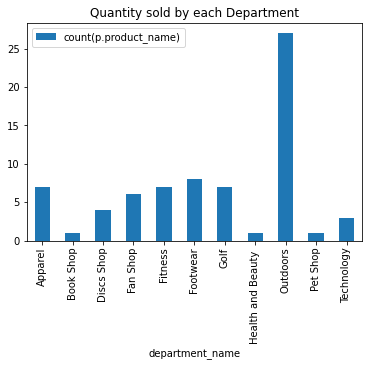

In [5]:
import pandas as pd 
from sqlalchemy import create_engine

query="SELECT d.department_name , count(p.product_name) from product p, department d where p.department_id = d.department_id group by d.department_id order by department_name"    

df = pd.read_sql(query,connectsql) 

plot=df.plot.bar(title="Quantity sold by each Department",x='department_name');

In [6]:
df_terpbuy = pd.read_sql("select count(distinct order_id) as 'Number of Orders', year(order_date) as 'Year of order' from orders \
group by year(order_date)",connectsql)
df_terpbuy

C:\Users\vivek kumar\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,Number of Orders,Year of order
0,585,2018
1,708,2019
2,497,2020
3,362,2021


C:\Users\vivek kumar\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


<AxesSubplot:xlabel='Year of order'>

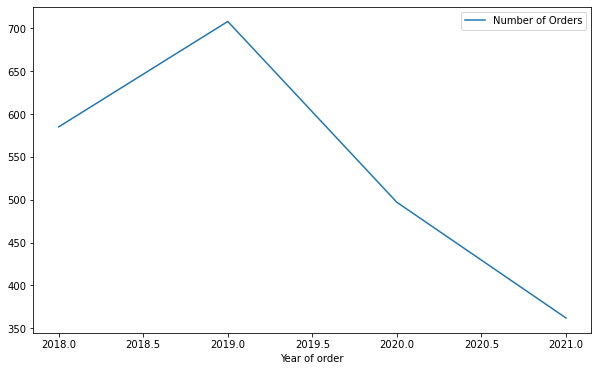

In [7]:
import matplotlib.pyplot as plt
df_terpbuy = pd.read_sql("select count(distinct order_id) as 'Number of Orders', year(order_date) as 'Year of order' from orders \
group by year(order_date)",connectsql)
df_terpbuy.plot ( kind = 'line', x = 'Year of order', y = 'Number of Orders', figsize=(10,6))